In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import os

import xarray as xr
import matplotlib.ticker as mticker
from matplotlib import colors as c
import geopandas
from shapely.geometry import Point, Polygon
import re

In [2]:
import cartopy as cy
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import cartopy.io.shapereader as shpreader
import matplotlib.ticker as mticker
from matplotlib import colors as c
import geopandas
from shapely.geometry import Point, Polygon

In [3]:
df = pd.read_csv('Trend_tabell7.csv', index_col=0, sep=',')
data = df
data

,Stations,Q- trend dir 5%,Q- trend 5%,Q- trend dir 30%,Q- trend 30%,AM30year trend dir,AM30year trend 5%,AM7year trend dir,AM7year trend 5%,AM30summer trend dir,...,Mean SD max,Mean SWE trend,Mean SWE,Mean SM trend,Mean SM,Mean E trend,Mean E,Q- spec,Q-95 spec,Q-5 spec
0,2.13.0,no trend,0,increasing,0.5,no trend,0,no trend,0,no trend,...,1879.197245,-1.0,271.364320,1.0,58.001339,1.0,0.392531,40.404675,3.092014,140.868794
1,2.32.0,increasing,1,increasing,0.5,increasing,1,increasing,1,increasing,...,794.471094,0.0,85.878275,0.0,93.734395,1.0,0.656346,22.035246,3.800504,61.091365
2,2.142.0,no trend,0,increasing,0.5,no trend,0,no trend,0,no trend,...,768.382971,0.0,53.060611,0.0,137.502855,1.0,1.167794,15.275147,2.243039,51.582771
3,2.268.0,no trend,0,increasing,0.5,no trend,0,no trend,0,no trend,...,1549.467074,0.0,225.350191,1.0,63.378361,1.0,0.365685,32.884382,1.210085,123.821120
4,2.279.0,increasing,1,increasing,0.5,no trend,0,no trend,0,increasing,...,1013.364774,0.0,76.034943,1.0,136.724436,1.0,1.202469,20.503860,2.812010,69.168333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
118,308.1.0,no trend,0,no trend,0.0,no trend,0,no trend,0,no trend,...,1557.724216,0.0,169.142100,0.0,98.330120,1.0,0.881928,32.499509,3.309569,122.088837
119,311.4.0,no trend,0,no trend,0.0,no trend,0,no trend,0,no trend,...,NaN,NaN,NaN,NaN,NaN,1.0,0.860267,13.330848,4.790052,32.317603
120,311.460.0,increasing,1,increasing,0.5,increasing,1,increasing,1,increasing,...,900.118874,0.0,83.155907,0.0,109.441859,1.0,0.868440,20.766787,4.590006,58.243358
121,313.10.0,no trend,0,no trend,0.0,no trend,0,no trend,0,no trend,...,582.628806,0.0,31.181174,0.0,154.597927,1.0,1.268005,14.897455,1.515315,47.420360


In [ ]:
from pathlib import Path
import pandas
import geopandas

folder = Path("nedbørsfeltNVE/regioner/")
shapefiles = folder.glob("*.shp")
gdf = pandas.concat([
    geopandas.read_file(shp)
    for shp in shapefiles
]).pipe(geopandas.GeoDataFrame)

In [17]:
import os
import geopandas as gpd
import pandas as pd

file = os.listdir("nedbørsfeltNVE/regioner/")
path = [os.path.join("nedbørsfeltNVE/regioner/", i) for i in file if i.endswith('.shp')]

gdf = gpd.GeoDataFrame(pd.concat([gpd.read_file(i) for i in path], 
                        ignore_index=True), crs=gpd.read_file(path[0]).crs)
gdf

,FID_Ostlan,FID_Vass50,OBJECTID,VASSOMR,NAVNVASSOM,AREAL_KM2,LANDAREAL,OBJTYPE,Shape_STAr,Shape_STLe,...,OPPDATERT,FTEMA,SHAPE_STAr,SHAPE_STLe,FID_tronde,FID_tron_1,FID_Finnma,FID_Finn_1,FID_NyVest,FID_SÃ¸rVe
0,0.0,-1.0,0.0,None,None,0.0,0.0,None,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,None,None,NaN,NaN,None,NaN,NaN,...,1899-12-30,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,None,None,NaN,NaN,None,NaN,NaN,...,NaN,NaN,NaN,NaN,0.0,-1.0,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,None,None,NaN,NaN,None,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,-1.0,NaN,NaN
4,NaN,NaN,NaN,None,None,NaN,NaN,None,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0


In [7]:
import matplotlib

In [26]:
min_val, max_val = 0.3,1.0
n = 10
orig_cmap = plt.cm.Blues
colors = orig_cmap(np.linspace(min_val, max_val, n))
cmap = matplotlib.colors.LinearSegmentedColormap.from_list("mycmap", colors)

In [27]:
file = os.listdir("nedbørsfeltNVE/regioner/")
path = [os.path.join("nedbørsfeltNVE/regioner/", i) for i in file if i.endswith('.shp')]

gdf = geopandas.GeoDataFrame(pd.concat([geopandas.read_file(i) for i in path], 
                        ignore_index=True), crs=geopandas.read_file(path[0]).crs)
gdf = gdf.to_crs({'init':'EPSG:4258'})

No handles with labels found to put in legend.


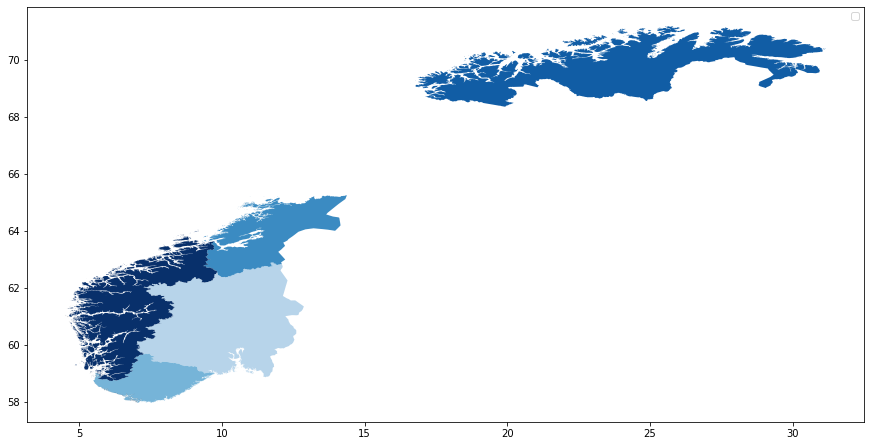

In [28]:
from matplotlib_scalebar.scalebar import ScaleBar
gdf.plot(cmap=cmap, legend='reverse', figsize=(15,15)) #column='names',)
plt.legend()
x, y, arrow_length = 0.80, 0.08, 0.05
ax.annotate('N', xy=(x, y), xytext=(x, y-arrow_length),
            arrowprops=dict(facecolor='black', width=5, headwidth=15),
            ha='center', va='center', fontsize=15,
            xycoords=ax.transAxes);
scalebar = ScaleBar(1, location='lower right')
ax.add_artist(scalebar)

#plt.savefig(+'.png')

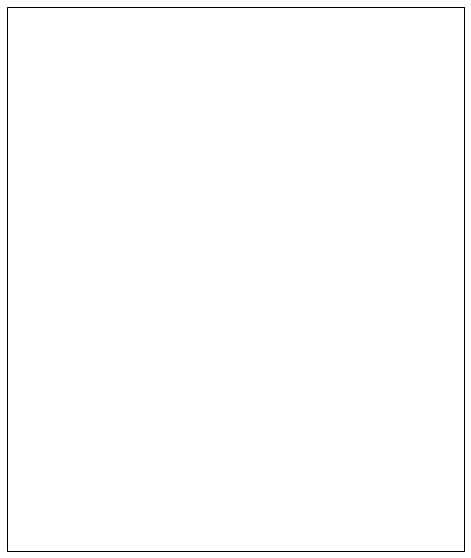

In [11]:
resolution = '10m'
category = 'cultural'
name = 'admin_0_countries'
#shpfilename = natural_earth(resolution, category, name)
# read the shapefile using geopandas
df = geopandas.read_file('land_shape/ne_10m_admin_0_countries.shp')
df2 = df.append(gdf, ignore_index=True)
# read the norwegian borders
poly = df2.loc[df2['ADMIN'] == 'Norway']['geometry'].values[0]
myproj = ccrs.PlateCarree()
mapproj = ccrs.Orthographic(central_longitude=13,central_latitude=63)

fig = plt.subplots(figsize=[10,10])
ax = plt.subplot(111, projection=mapproj)
#ax.add_geometries(poly, crs=myproj, facecolor='none', edgecolor='#D3D3D3')
ax.add_geometries(gdf.geometry[0], crs=myproj, facecolor='red',edgecolor='black', linewidth=0.3)
ax_extent = [4, 27, 57.5, 72]
ax.set_extent(ax_extent)

In [12]:
df2

,featurecla,scalerank,LABELRANK,SOVEREIGNT,SOV_A3,ADM0_DIF,LEVEL,TYPE,ADMIN,ADM0_A3,...,OPPDATERT,FTEMA,SHAPE_STAr,SHAPE_STLe,FID_tronde,FID_tron_1,FID_Finnma,FID_Finn_1,FID_NyVest,FID_SÃ¸rVe
0,Admin-0 country,5.0,2.0,Indonesia,IDN,0.0,2.0,Sovereign country,Indonesia,IDN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Admin-0 country,5.0,3.0,Malaysia,MYS,0.0,2.0,Sovereign country,Malaysia,MYS,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Admin-0 country,6.0,2.0,Chile,CHL,0.0,2.0,Sovereign country,Chile,CHL,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Admin-0 country,0.0,3.0,Bolivia,BOL,0.0,2.0,Sovereign country,Bolivia,BOL,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Admin-0 country,0.0,2.0,Peru,PER,0.0,2.0,Sovereign country,Peru,PER,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
255,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
256,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1899-12-30,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
257,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,0.0,-1.0,NaN,NaN,NaN,NaN
258,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,-1.0,NaN,NaN


In [13]:
dirl_shape  = "nedbørsfeltNVE/NVE_shape/NVEData/Hydrologi/"
files = os.listdir(dirl_shape)
files = np.sort(files)
files_txt = [i for i in files if i.endswith('.shx')]

myfile = dirl_shape+files_txt[0]
import geopandas as gpd
shapefile = gpd.read_file(myfile)
print(shapefile.iloc[0])
#shapefile.plot() 

objType                                   NedbørfeltMålestasjon
feltNr                                                     1902
stSamletID                                         016000001000
stID                                                    160.1.0
stNavn                                             Storglåmvatn
areal_km2                                                251.85
Q6190Mm3Aa                                               797.15
Q6190mmAar                                              3165.18
Q6190lskm2                                               100.32
vf6190m3s                                                 25.27
uttakDato                                            2021-09-23
ekspType                               NVEs nedlastningsløsning
geometry      POLYGON Z ((14.35082813994262 66.7934058783317...
Name: 0, dtype: object


In [14]:
dirl  = "Final_dataset/"
files = os.listdir(dirl)
files = np.sort(files)
files_txt = [i for i in files if i.endswith('.txt_')]

files_txt = [i[:-5] for i in files if i.endswith('.txt_')]
files_txt.sort(key=int)

new_list = []
for i in files_txt:
    new_list.append(i[0:-5]+'.'+i[-5:])
re_zero = r"[0]{2,4}"
removed_zeros = []
for i in new_list:
    j = i+".0"
    removed_zeros.append(re.sub(re_zero, "", j))
removed_zeros.remove('2.4.0')
my_st = removed_zeros

selected_stations = files_txt
nf = shapefile
nf_selected = nf[nf.stID.isin(my_st)]
nf_selected = nf_selected.reset_index()
st_names = nf_selected.stID

In [15]:
#nf_selected = nf_selected.to_crs()
#nf_selected.plot()
nf_selected.crs

{'init': 'epsg:4258'}

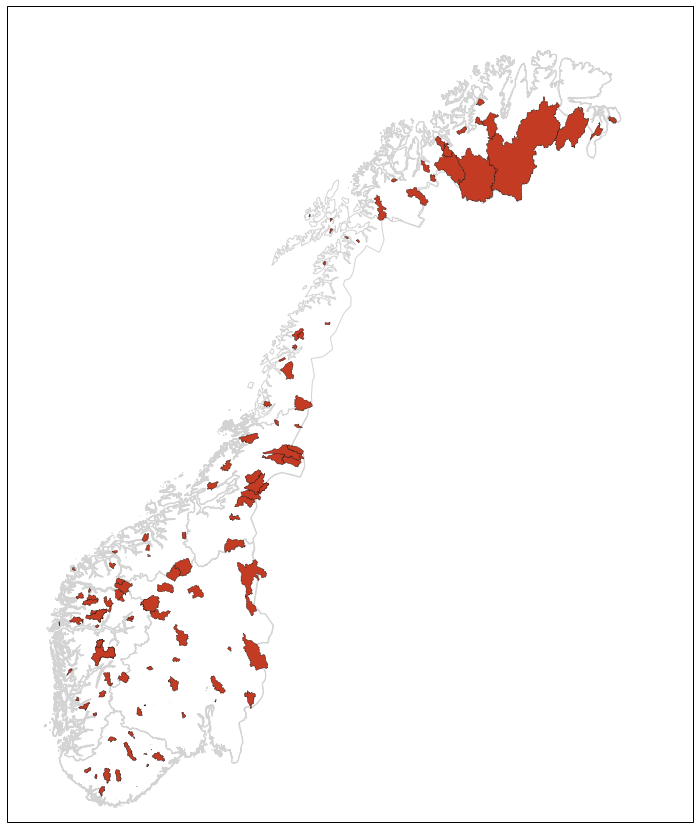

In [25]:
resolution = '10m'
category = 'cultural'
name = 'admin_0_countries'
#shpfilename = natural_earth(resolution, category, name)
# read the shapefile using geopandas
df = geopandas.read_file('land_shape/ne_10m_admin_0_countries.shp')
df2 = df.append(nf_selected, ignore_index=True)
# read the norwegian borders
poly = df2.loc[df2['ADMIN'] == 'Norway']['geometry'].values[0]
myproj = ccrs.PlateCarree()
mapproj = ccrs.Orthographic(central_longitude=13,central_latitude=63)

fig = plt.subplots(figsize=[15,15])
ax = plt.subplot(111, projection=mapproj)
ax.add_geometries(poly, crs=myproj, facecolor='none', edgecolor='#D3D3D3')
ax.add_geometries(gdf.geometry, crs=myproj, facecolor='none', edgecolor='#D3D3D3')
ax.add_geometries(nf_selected.geometry, crs=myproj, facecolor='#C23B22',edgecolor='black', linewidth=0.3)
ax_extent = [4, 27, 57.5, 72]
ax.set_extent(ax_extent)
plt.savefig('mine_nedbørfelt.png')